In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 시각화 설정
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")
sns.set_palette("husl")

## 데이터 확인

In [78]:
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

print('Dataset size of train/test')
print(f'Train: {train_df.shape}')
print(f'Test: {test_df.shape}')
print('='*50)

print('\nColumn Info')
print(f'Train column: {list(train_df.columns)}')
print(f'Test column: {list(test_df.columns)}')

print('='*50)

# 필수 컬럼 선택
train_df = train_df[['text', 'sentiment']]
test_df = test_df[['text', 'sentiment']]

print('\nDisplay Selected Data Sample')
display(train_df.head(), test_df.head())

Dataset size of train/test
Train: (27481, 10)
Test: (3534, 9)

Column Info
Train column: ['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km?', 'Density (P/Km?']
Test column: ['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km?', 'Density (P/Km?']

Display Selected Data Sample


,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


## 결측값 처리

In [79]:
# Train 데이터 결측값
print("Train 데이터 결측값:")
train_null_info = train_df.isnull().sum()
print(train_null_info)

# Test 데이터 결측값
print("\nTest 데이터 결측값:")
test_null_info = test_df.isnull().sum()
print(test_null_info)

# Train 데이터의 null sentiment 확인
train_null_sentiment = train_df['sentiment'].isnull().sum()
print(f"\nTrain 데이터 null sentiment: {train_null_sentiment}개")

# Test 데이터의 null sentiment 확인
test_null_sentiment = test_df['sentiment'].isnull().sum()
print(f"\nTest 데이터 null sentiment: {test_null_sentiment}개")

Train 데이터 결측값:
text         1
sentiment    0
dtype: int64

Test 데이터 결측값:
text         0
sentiment    0
dtype: int64

Train 데이터 null sentiment: 0개

Test 데이터 null sentiment: 0개


In [80]:
# 원본 크기 저장
original_train_len = len(train_df)
original_test_len = len(test_df)

# Train 데이터: text 결측값 1개만 제거
train_df = train_df.dropna(subset=['text']).reset_index(drop=True)
print(f"Train 데이터: text 결측값 제거 {original_train_len} → {len(train_df)} ({original_train_len - len(train_df)}개 제거)")

# Test 데이터: sentiment 기준으로 분리
test_labeled = test_df.dropna(subset=['sentiment']).reset_index(drop=True)
test_unlabeled = test_df[test_df['sentiment'].isnull()].reset_index(drop=True)

print(f"Test 데이터: 라벨 있음 {len(test_labeled)}개, 라벨 없음 {len(test_unlabeled)}개")

# 라벨이 있는 test 데이터만 사용 (평가용)
test_df = test_labeled

print(f"\n최종 사용 데이터:")
print(f"  Train: {len(train_df)}개")
print(f"  Test: {len(test_df)}개")

Train 데이터: text 결측값 제거 27481 → 27480 (1개 제거)
Test 데이터: 라벨 있음 3534개, 라벨 없음 0개

최종 사용 데이터:
  Train: 27480개
  Test: 3534개


## Sentiment Column Analysis

Train 감정 분포:
  neutral : 11117개 ( 40.5%)
  positive:  8582개 ( 31.2%)
  negative:  7781개 ( 28.3%)

Test 감정 분포:
  neutral :  1430개 ( 40.5%)
  positive:  1103개 ( 31.2%)
  negative:  1001개 ( 28.3%)


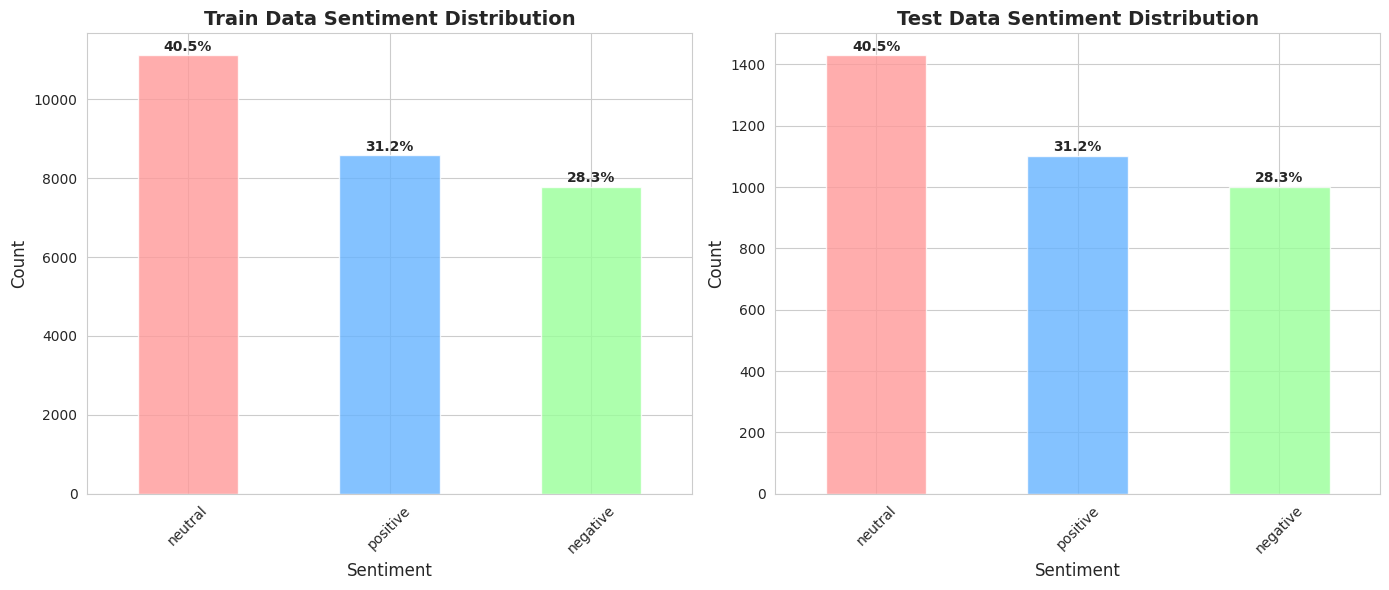

In [81]:
train_sentiment_counts = train_df['sentiment'].value_counts()
test_sentiment_counts = test_df['sentiment'].value_counts()

# 통계 출력
print("Train 감정 분포:")
for sentiment, count in train_sentiment_counts.items():
    percentage = count / len(train_df) * 100
    print(f"  {sentiment:8s}: {count:5d}개 ({percentage:5.1f}%)")

print("\nTest 감정 분포:")
for sentiment, count in test_sentiment_counts.items():
    percentage = count / len(test_df) * 100
    print(f"  {sentiment:8s}: {count:5d}개 ({percentage:5.1f}%)")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Train 분포
colors = ['#ff9999', '#66b3ff', '#99ff99']
train_sentiment_counts.plot(kind='bar', ax=ax1, color=colors, alpha=0.8)
ax1.set_title('Train Data Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 백분율 표시
for i, (sentiment, count) in enumerate(train_sentiment_counts.items()):
    percentage = count / len(train_df) * 100
    ax1.text(i, count + max(train_sentiment_counts) * 0.01, 
            f'{percentage:.1f}%', ha='center', fontweight='bold')

# Test 분포
test_sentiment_counts.plot(kind='bar', ax=ax2, color=colors, alpha=0.8)
ax2.set_title('Test Data Sentiment Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# 백분율 표시
for i, (sentiment, count) in enumerate(test_sentiment_counts.items()):
    percentage = count / len(test_df) * 100
    ax2.text(i, count + max(test_sentiment_counts) * 0.01, 
            f'{percentage:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
fig.savefig("data_label_distribution.png", dpi=300)  # 저장
plt.show()

## Text Columns Analysis

In [82]:
# 텍스트 길이 계산
train_df['text_length'] = train_df['text'].astype(str).str.len()
train_df['word_count'] = train_df['text'].astype(str).str.split().str.len()

test_df['text_length'] = test_df['text'].astype(str).str.len()
test_df['word_count'] = test_df['text'].astype(str).str.split().str.len()

# 통계 출력
print("텍스트 길이 통계:")
print("\nTrain 데이터:")
train_stats = train_df[['text_length', 'word_count']].describe()
display(train_stats)

print("\nTest 데이터:")
test_stats = test_df[['text_length', 'word_count']].describe()
display(test_stats)

# 모델링에 중요한 정보
print(f"\n모델링 참고 정보:")
print(f"  최대 텍스트 길이 (Train): {train_df['text_length'].max()}")
print(f"  최대 단어 수 (Train): {train_df['word_count'].max()}")
print(f"  평균 텍스트 길이: {train_df['text_length'].mean():.1f}")
print(f"  평균 단어 수: {train_df['word_count'].mean():.1f}")

텍스트 길이 통계:

Train 데이터:


,text_length,word_count
count,27480.000000,27480.000000
mean,68.328093,12.902693
std,35.602949,6.925933
min,3.000000,1.000000
25%,39.000000,7.000000
50%,64.000000,12.000000
75%,97.000000,18.000000
max,141.000000,33.000000



Test 데이터:


,text_length,word_count
count,3534.000000,3534.000000
mean,67.761460,12.763158
std,35.575245,6.907024
min,4.000000,1.000000
25%,38.000000,7.000000
50%,63.000000,12.000000
75%,96.750000,18.000000
max,142.000000,32.000000



모델링 참고 정보:
  최대 텍스트 길이 (Train): 141
  최대 단어 수 (Train): 33
  평균 텍스트 길이: 68.3
  평균 단어 수: 12.9


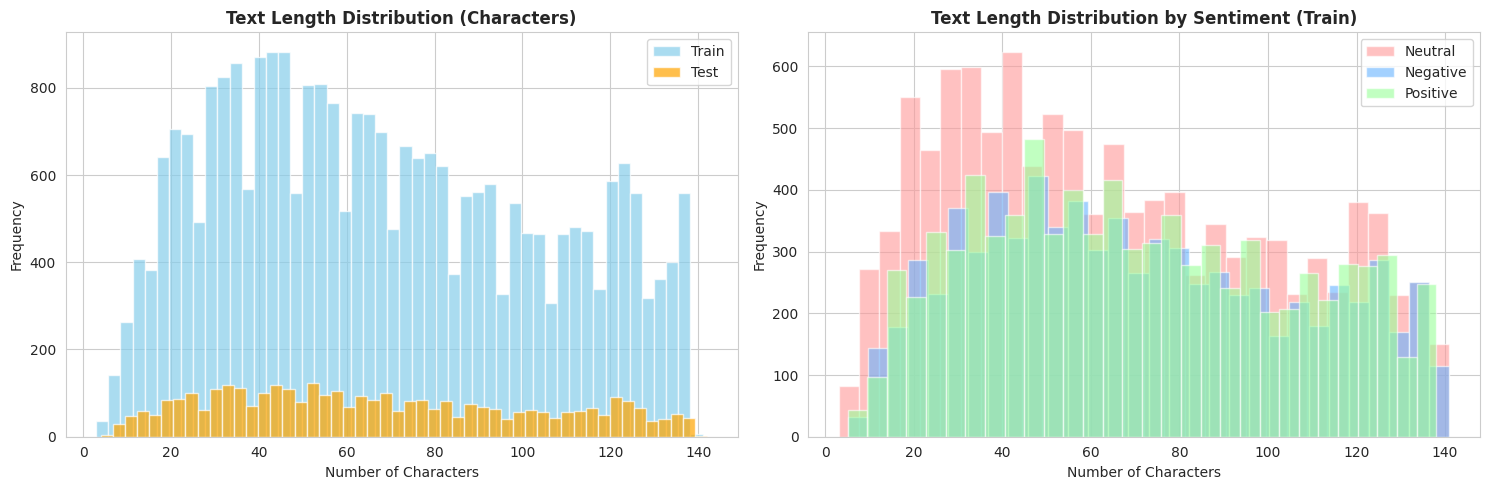

In [83]:
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 문자 길이 분포
axes[0].hist(train_df['text_length'], bins=50, alpha=0.7, label='Train', color='skyblue')
axes[0].hist(test_df['text_length'], bins=50, alpha=0.7, label='Test', color='orange')
axes[0].set_title('Text Length Distribution (Characters)', fontweight='bold')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# 감정별 텍스트 길이 (Train)
sentiments = train_df['sentiment'].unique()
colors = ['#ff9999', '#66b3ff', '#99ff99']

for i, sentiment in enumerate(sentiments):
    sentiment_data = train_df[train_df['sentiment'] == sentiment]['text_length']
    axes[1].hist(sentiment_data, bins=30, alpha=0.6, 
                   label=sentiment.title(), color=colors[i % len(colors)])

axes[1].set_title('Text Length Distribution by Sentiment (Train)', fontweight='bold')
axes[1].set_xlabel('Number of Characters')
axes[1].set_ylabel('Frequency')
axes[1].legend()


plt.tight_layout()
fig.savefig("text_length_distribution.png", dpi=300)  # 저장
plt.show()

## 정제된 데이터 저장

In [84]:
mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
train_df['sentiment'] = train_df['sentiment'].map(mapping)
test_df['sentiment'] = test_df['sentiment'].map(mapping)

train_df = train_df[['text', 'sentiment']]
test_df = test_df[['text', 'sentiment']]

In [85]:
train_df.to_csv('./dataset/train_cleaned.csv', index=False)
test_df.to_csv('./dataset/test_cleaned.csv', index=False)